#### Sample multilayer perceptron model 

In [0]:
## Place this cell in any team notebook that needs access to the team cloud storage.


# The following blob storage is accessible to team members only (read and write)
# access key is valid til TTL
# after that you will need to create a new SAS key and authenticate access again via DataBrick command line
blob_container  = "261-final-project"       # The name of your container created in https://portal.azure.com
storage_account = "ansonbquon"  # The name of your Storage account created in https://portal.azure.com
secret_scope    = "final_project"           # The name of the scope created in your local computer using the Databricks CLI
secret_key      = "project_key"             # The name of the secret key created in your local computer using the Databricks CLI
team_blob_url   = f"wasbs://{blob_container}@{storage_account}.blob.core.windows.net"  #points to the root of your team storage bucket


# the 261 course blob storage is mounted here.
mids261_mount_path      = "/mnt/mids-w261"

# SAS Token: Grant the team limited access to Azure Storage resources
spark.conf.set(
  f"fs.azure.sas.{blob_container}.{storage_account}.blob.core.windows.net",
  dbutils.secrets.get(scope = secret_scope, key = secret_key)
)

# Navigate back to your Storage account in https://portal.azure.com, to inspect the partitions/files.
# df.write.parquet(f"{team_blob_url}/TP")



# see what's in the blob storage root folder 
display(dbutils.fs.ls(f"{team_blob_url}"))

path name size modificationTime wasbs://261-final-project@ansonbquon.blob.core.windows.net/AQ/ AQ/ 0 1732415456000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/GW/ GW/ 0 1730609022000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/JD/ JD/ 0 1731294152000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/JLD/ JLD/ 0 1732040358000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/NAG/ NAG/ 0 1731800137000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/ PRD/ 0 1731294177000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/SK/ SK/ 0 1731537320000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/TP/ TP/ 0 1731270653000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/TST/ TST/ 0 1731294173000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/base/ base/ 0 1731365844000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/joined_table_features_parquet/ joined_table_features_parquet/ 0 1731132599000

In [0]:
display(dbutils.fs.ls(f"{team_blob_url}/PRD"))

path name size modificationTime wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/1ymodel/ 1ymodel/ 0 1733581182000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/parquet_prod_data/ parquet_prod_data/ 0 1733579281000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/parquet_prod_data_1y/ parquet_prod_data_1y/ 0 1733579343000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval/ xval/ 0 1733543026000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_2020/ xval_2020/ 0 1734024312000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/ xval_corrected/ 0 1733964471000

In [0]:
display(dbutils.fs.ls(f"{team_blob_url}/PRD/xval_corrected"))

path name size modificationTime wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_final_val_processed/ df_final_val_processed/ 0 1733971583000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_xval1-3_train_processed/ df_xval1-3_train_processed/ 0 1733971467000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_xval1_test_processed/ df_xval1_test_processed/ 0 1733970723000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_xval1_train_processed/ df_xval1_train_processed/ 0 1733970635000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_xval2_test_processed/ df_xval2_test_processed/ 0 1733970941000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_xval2_train_processed/ df_xval2_train_processed/ 0 1733970915000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_xval3_test_processed/ df_xval3_test_processed/ 0 1733971148000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_xval3_train_processed/ df_xval3_train_processed/ 0 1733971117000

In [0]:
display(dbutils.fs.ls(f"{team_blob_url}/PRD/xval_corrected/df_final_val_processed"))

path name size modificationTime wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_final_val_processed/_committed_4020652281530789445 _committed_4020652281530789445 6913 1733967188000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_final_val_processed/_committed_4515635413317571101 _committed_4515635413317571101 9203 1733971583000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_final_val_processed/_committed_83093178835849523 _committed_83093178835849523 4657 1733966744000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_final_val_processed/_started_4515635413317571101 _started_4515635413317571101 0 1733971523000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_final_val_processed/_started_4784141267727806625 _started_4784141267727806625 0 1733970672000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_final_val_processed/part-00000-tid-4515635413317571101-e59c54bb-0122-4831-909e-d94a608fd14c-35650-1-c000.snappy.parquet part-00000-tid-4515635413317571101-e59c54bb-0122-4831-909e-d94a608fd14c-35650-1-c000.snappy.parquet 12598761 1733971538000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_final_val_processed/part-00001-tid-4515635413317571101-e59c54bb-0122-4831-909e-d94a608fd14c-35651-1-c000.snappy.parquet part-00001-tid-4515635413317571101-e59c54bb-0122-4831-909e-d94a608fd14c-35651-1-c000.snappy.parquet 12871403 1733971537000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_final_val_processed/part-00002-tid-4515635413317571101-e59c54bb-0122-4831-909e-d94a608fd14c-35652-1-c000.snappy.parquet part-00002-tid-4515635413317571101-e59c54bb-0122-4831-909e-d94a608fd14c-35652-1-c000.snappy.parquet 12572014 1733971536000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_final_val_processed/part-00003-tid-4515635413317571101-e59c54bb-0122-4831-909e-d94a608fd14c-35653-1-c000.snappy.parquet part-00003-tid-4515635413317571101-e59c54bb-0122-4831-909e-d94a608fd14c-35653-1-c000.snappy.parquet 12517335 1733971564000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_final_val_processed/part-00004-tid-4515635413317571101-e59c54bb-0122-4831-909e-d94a608fd14c-35654-1-c000.snappy.parquet part-00004-tid-4515635413317571101-e59c54bb-0122-4831-909e-d94a608fd14c-35654-1-c000.snappy.parquet 12747054 1733971582000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_final_val_processed/part-00005-tid-4515635413317571101-e59c54bb-0122-4831-909e-d94a608fd14c-35655-1-c000.snappy.parquet part-00005-tid-4515635413317571101-e59c54bb-0122-4831-909e-d94a608fd14c-35655-1-c000.snappy.parquet 12623237 1733971537000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_final_val_processed/part-00005-tid-4784141267727806625-306e2bd6-270b-4b16-a2d4-52f96996f7e2-27794-1-c000.snappy.parquet part-00005-tid-4784141267727806625-306e2bd6-270b-4b16-a2d4-52f96996f7e2-27794-1-c000.snappy.parquet 4411204 1733970675000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_final_val_processed/part-00006-tid-4515635413317571101-e59c54bb-0122-4831-909e-d94a608fd14c-35656-1-c000.snappy.parquet part-00006-tid-4515635413317571101-e59c54bb-0122-4831-909e-d94a608fd14c-35656-1-c000.snappy.parquet 12683826 1733971538000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_final_val_processed/part-00007-tid-4515635413317571101-e59c54bb-0122-4831-909e-d94a608fd14c-35657-1-c000.snappy.parquet part-00007-tid-4515635413317571101-e59c54bb-0122-4831-909e-d94a608fd14c-35657-1-c000.snappy.parquet 12564472 1733971562000 wasbs://261-final-project@ansonbquon.blob.core.windows.net/PRD/xval_corrected/df_final_val_processed/part-00008-tid-4515635413317571101-e59c54bb-0122-4831-909e-d

In [0]:
df = spark.read.parquet(f"{team_blob_url}/PRD/xval_corrected/df_final_val_processed/")


2024-12-13 18:35:05.758143: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 18:35:05.762763: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 18:35:05.778032: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734114905.805063   17985 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734114905.813167   17985 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-13 18:35:05.841555: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [0]:
display(df)

quarter month dayOfMonth dayOfWeek opUniqueCarrier tailNum opCarrierFlNum origin dest crsDepTime depDel15 crsElapsedTime distance year originType originIsoRegion destType destIsoRegion originPrevF crsDepTimePrevF depTimePrevF depDel15PrevF depDelayGroupPrevF depTimeBlkPrevF crsArrTimePrevF arrTimePrevF arrDel15PrevF arrDelayGroupPrevF arrTimeBlkPrevF crsElapsedTimePrevF actualElapsedTimePrevF distancePrevF originTypePrevF timeBtwFlights timeBtwFlightsPlanned hourlyAltimeterSetting hourlyDewPointTemperature hourlyDryBulbTemperature hourlyPrecipitation hourlyPressureChange hourlyPressureTendency hourlyRelativeHumidity hourlySeaLevelPressure hourlyStationPressure hourlyVisibility hourlyWetBulbTemperature hourlyWindDirection hourlyWindGustSpeed hourlyWindSpeed crsDepTimeSine monthSine dayOfWeekSine daysToNearestHoliday originPageRank destPageRank predictedMeanHourlyPrecipitation predictedMeanHourlyVisibility predictedMeanHourlyDewPointTemp numeric_feat_to_scale scaled_features quarterIndex monthIndex dayOfMonthIndex dayOfWeekIndex opUniqueCarrierIndex yearIndex originTypeIndex destTypeIndex depDel15PrevFIndex depDelayGroupPrevFIndex depTimeBlkPrevFIndex arrDel15PrevFIndex arrDelayGroupPrevFIndex arrTimeBlkPrevFIndex originTypePrevFIndex tailNumIndex opCarrierFlNumIndex originIndex destIndex originIsoRegionIndex destIsoRegionIndex originPrevFIndex tailNumBinIndex0 tailNumBinIndex1 tailNumBinIndex2 tailNumBinIndex3 tailNumBinIndex4 tailNumBinIndex5 tailNumBinIndex6 tailNumBinIndex7 tailNumBinIndex8 tailNumBinIndex9 tailNumBinIndex10 tailNumBinIndex11 tailNumBinIndex12 opCarrierFlNumBinIndex0 opCarrierFlNumBinIndex1 opCarrierFlNumBinIndex2 opCarrierFlNumBinIndex3 opCarrierFlNumBinIndex4 opCarrierFlNumBinIndex5 opCarrierFlNumBinIndex6 opCarrierFlNumBinIndex7 opCarrierFlNumBinIndex8 opCarrierFlNumBinIndex9 opCarrierFlNumBinIndex10 opCarrierFlNumBinIndex11 opCarrierFlNumBinIndex12 originBinIndex0 originBinIndex1 originBinIndex2 originBinIndex3 originBinIndex4 originBinIndex5 originBinIndex6 originBinIndex7 originBinIndex8 destBinIndex0 destBinIndex1 destBinIndex2 destBinIndex3 destBinIndex4 destBinIndex5 destBinIndex6 destBinIndex7 destBinIndex8 originIsoRegionBinIndex0 originIsoRegionBinIndex1 originIsoRegionBinIndex2 originIsoRegionBinIndex3 originIsoRegionBinIndex4 originIsoRegionBinIndex5 destIsoRegionBinIndex0 destIsoRegionBinIndex1 destIsoRegionBinIndex2 destIsoRegionBinIndex3 destIsoRegionBinIndex4 destIsoRegionBinIndex5 originPrevFBinIndex0 originPrevFBinIndex1 originPrevFBinIndex2 originPrevFBinIndex3 originPrevFBinIndex4 originPrevFBinIndex5 originPrevFBinIndex6 originPrevFBinIndex7 originPrevFBinIndex8 scaled_array 3 7 11 4 OH N549NN 5181 CLT GRR 917 0.0 0.25826193390452873 0.11147011308562198 2019 large_airport US-NC medium_airport US-MI MSY 1753 1801 0.0 0 1700-1759 2110 2110 0.0 0 2100-2159 137.0 0.2288135593220339 0.12537855844942458 large_airport 0.12774556316991742 727.0 0.6495177046075646 0.9130434782608695 0.738095238095238 0.0 0.786885251082606 0.1111111111111111 0.8787878787878789 0.544827273229521 0.8097885388924096 0.09997988094399447 0.9 0.5 0.08854166666666666 0.002682163611980331 0.65 -0.5 -0.43 0.0 0.2999791745405577 0.06699638597315753 0.46689847166685444 0.8397661027122847 0.6037045879055818 Map(vectorType -> dense, length -> 25, values -> List(112.0, 583.0, 129.0, 651.0, 727.0, 30.0, 73.0, 77.0, 0.0, -0.009999999776482582, 1.0, 88.0, 29.969999313354492, 29.229999542236328, 9.9399995803833, 74.0, 180.0, 19.5, 6.0, -999.0, 0.00485867300457333, 10.262249822630947, 70.58091749729022, 3.773258686065674, 1.0008331537246704)) Map(vectorType -> dense, length -> 25, values -> List(0.25826193390452873, 0.11147011308562198, 0.2288135593220339, 0.12537855844942458, 0.12774556316991742, 0.6495177046075646, 0.9130434782608695, 0.738095238095238, 0.0, 0.786885251082606, 0.1111111111111111, 0.8787878787878789, 0.544827273229521, 0.8097885388924096, 0.09997988094399447, 0.9, 0.5, 0.08854166666666666, 0.002682163611980331, 0

In [0]:
# Split the DataFrame into train (80%) and test (20%)
df_train, df_test = df.randomSplit([0.8, 0.2], seed=42)

# Check the counts
print(f"Training set count: {df_train.count()}")
print(f"Testing set count: {df_test.count()}")

Training set count: 1989160
Testing set count: 497869


In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define features and label
feature_columns = [
    'crsDepTime', 'crsElapsedTime', 'distance', 'timeBtwFlights',
    'hourlyAltimeterSetting', 'hourlyDewPointTemperature', 'hourlyDryBulbTemperature',
    'hourlyPrecipitation', 'hourlyPressureChange', 'hourlyRelativeHumidity',
    'hourlyVisibility', 'hourlyWindSpeed', 'crsDepTimeSine', 'monthSine', 'dayOfWeekSine',
    'daysToNearestHoliday', 'originPageRank', 'destPageRank'
] + [
    col for col in train_df.columns if col.endswith("Index") or col.endswith("BinIndex0")
]

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="assembledFeatures")

# Scale features to a range [0, 1]
scaler = MinMaxScaler(inputCol="assembledFeatures", outputCol="features")

# Define the neural network layers
# Layers: input layer size = number of features, hidden layers, output layer size = 2 (binary classification)
layers_1 = [len(feature_columns), 10, 5, 2]
layers_2 = [len(feature_columns), 20, 10, 5, 2]

# Define two MLP classifiers
mlp_1 = MultilayerPerceptronClassifier(maxIter=100, layers=layers_1, blockSize=128, seed=42, labelCol="depDel15", featuresCol="features")
mlp_2 = MultilayerPerceptronClassifier(maxIter=100, layers=layers_2, blockSize=128, seed=42, labelCol="depDel15", featuresCol="features")

# Define pipelines
pipeline_1 = Pipeline(stages=[assembler, scaler, mlp_1])
pipeline_2 = Pipeline(stages=[assembler, scaler, mlp_2])

# Train and evaluate Model 1
model_1 = pipeline_1.fit(train_df)
predictions_1 = model_1.transform(test_df)

evaluator = MulticlassClassificationEvaluator(labelCol="depDel15", predictionCol="prediction")
accuracy_1 = evaluator.setMetricName("accuracy").evaluate(predictions_1)
precision_1 = evaluator.setMetricName("weightedPrecision").evaluate(predictions_1)
recall_1 = evaluator.setMetricName("weightedRecall").evaluate(predictions_1)
f1_score_1 = evaluator.setMetricName("f1").evaluate(predictions_1)

print(f"Model 1 (3 layers):\n Accuracy: {accuracy_1}\n Precision: {precision_1}\n Recall: {recall_1}\n F1 Score: {f1_score_1}")

# Train and evaluate Model 2
model_2 = pipeline_2.fit(train_df)
predictions_2 = model_2.transform(test_df)

accuracy_2 = evaluator.setMetricName("accuracy").evaluate(predictions_2)
precision_2 = evaluator.setMetricName("weightedPrecision").evaluate(predictions_2)
recall_2 = evaluator.setMetricName("weightedRecall").evaluate(predictions_2)
f1_score_2 = evaluator.setMetricName("f1").evaluate(predictions_2)

print(f"Model 2 (4 layers):\n Accuracy: {accuracy_2}\n Precision: {precision_2}\n Recall: {recall_2}\n F1 Score: {f1_score_2}")

Model 1 (3 layers):
 Accuracy: 0.7022220796226816
 Precision: 0.7046770971624587
 Recall: 0.7022220796226817
 F1 Score: 0.7023817903343126
Model 2 (4 layers):
 Accuracy: 0.6979227034733906
 Precision: 0.7039613950188714
 Recall: 0.6979227034733906
 F1 Score: 0.6975787660143591


In [0]:
predictions_1_train = model_1.transform(train_df)

evaluator = MulticlassClassificationEvaluator(labelCol="depDel15", predictionCol="prediction")
accuracy_1 = evaluator.setMetricName("accuracy").evaluate(predictions_1_train)
precision_1 = evaluator.setMetricName("weightedPrecision").evaluate(predictions_1_train)
recall_1 = evaluator.setMetricName("weightedRecall").evaluate(predictions_1_train)
f1_score_1 = evaluator.setMetricName("f1").evaluate(predictions_1_train)

print(f"Model 1 Train (3 layers):\n Accuracy: {accuracy_1}\n Precision: {precision_1}\n Recall: {recall_1}\n F1 Score: {f1_score_1}")

predictions_2_train = model_2.transform(test_df)

accuracy_2 = evaluator.setMetricName("accuracy").evaluate(predictions_2_train)
precision_2 = evaluator.setMetricName("weightedPrecision").evaluate(predictions_2_train)
recall_2 = evaluator.setMetricName("weightedRecall").evaluate(predictions_2_train)
f1_score_2 = evaluator.setMetricName("f1").evaluate(predictions_2_train)

print(f"Model 2 Train (4 layers):\n Accuracy: {accuracy_2}\n Precision: {precision_2}\n Recall: {recall_2}\n F1 Score: {f1_score_2}")

Model 1 Train (3 layers):
 Accuracy: 0.7017688841765142
 Precision: 0.704193994615298
 Recall: 0.7017688841765142
 F1 Score: 0.7019152293469735
Model 2 Train (4 layers):
 Accuracy: 0.6978409767420417
 Precision: 0.7038608903046022
 Recall: 0.6978409767420417
 F1 Score: 0.6974869319379084


In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Define features and label
feature_columns = [
    'crsDepTime', 'crsElapsedTime', 'distance', 'timeBtwFlights',
    'hourlyAltimeterSetting', 'hourlyDewPointTemperature', 'hourlyDryBulbTemperature',
    'hourlyPrecipitation', 'hourlyPressureChange', 'hourlyRelativeHumidity',
    'hourlyVisibility', 'hourlyWindSpeed', 'crsDepTimeSine', 'monthSine', 'dayOfWeekSine',
    'daysToNearestHoliday', 'originPageRank', 'destPageRank'
] + [
    col for col in train_df.columns if col.endswith("Index") or col.endswith("BinIndex0")
]

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="assembledFeatures")

# Scale features to a range [0, 1]
scaler = MinMaxScaler(inputCol="assembledFeatures", outputCol="features")

# Define the neural network layers
layers = [
    [len(feature_columns), 10, 5, 2],  # Smaller architecture
    [len(feature_columns), 20, 10, 5, 2]  # Larger architecture
]

# Initialize MLP Classifier
mlp = MultilayerPerceptronClassifier(maxIter=100, blockSize=128, seed=42, labelCol="depDel15", featuresCol="features")

# Build a parameter grid for hyperparameter tuning
paramGrid = ParamGridBuilder() \
    .addGrid(mlp.layers, layers) \
    .addGrid(mlp.stepSize, [0.01, 0.1]) \
    .addGrid(mlp.maxIter, [50, 100]) \
    .build()

# Define evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="depDel15", predictionCol="prediction", metricName="accuracy")

# Set up cross-validation
crossval = CrossValidator(
    estimator=Pipeline(stages=[assembler, scaler, mlp]),
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=3  # Perform 3-fold cross-validation
)

# Train the model using cross-validation
cvModel = crossval.fit(train_df)

bestModel = cvModel.bestModel
predictions = bestModel.transform(test_df)

accuracy = evaluator.setMetricName("accuracy").evaluate(predictions)
precision = evaluator.setMetricName("weightedPrecision").evaluate(predictions)
recall = evaluator.setMetricName("weightedRecall").evaluate(predictions)
f1_score = evaluator.setMetricName("f1").evaluate(predictions)

print(f"Best Model Metrics:\n Accuracy: {accuracy}\n Precision: {precision}\n Recall: {recall}\n F1 Score: {f1_score}")


Best Model Metrics:
 Accuracy: 0.7050330438198936
 Precision: 0.7101008204514304
 Recall: 0.7050330438198936
 F1 Score: 0.7048586858429533


                   Feature  Correlation
0       depDel15PrevFIndex     0.308965
1            depDel15PrevF     0.232961
2           crsDepTimeSine     0.227417
3  depDelayGroupPrevFIndex     0.191641
4     depTimeBlkPrevFIndex     0.173253
5            arrDel15PrevF     0.102599
6          hourlyWindSpeed     0.093838
7   hourlyAltimeterSetting     0.083100
8       arrDel15PrevFIndex     0.080147
9   hourlySeaLevelPressure     0.078540


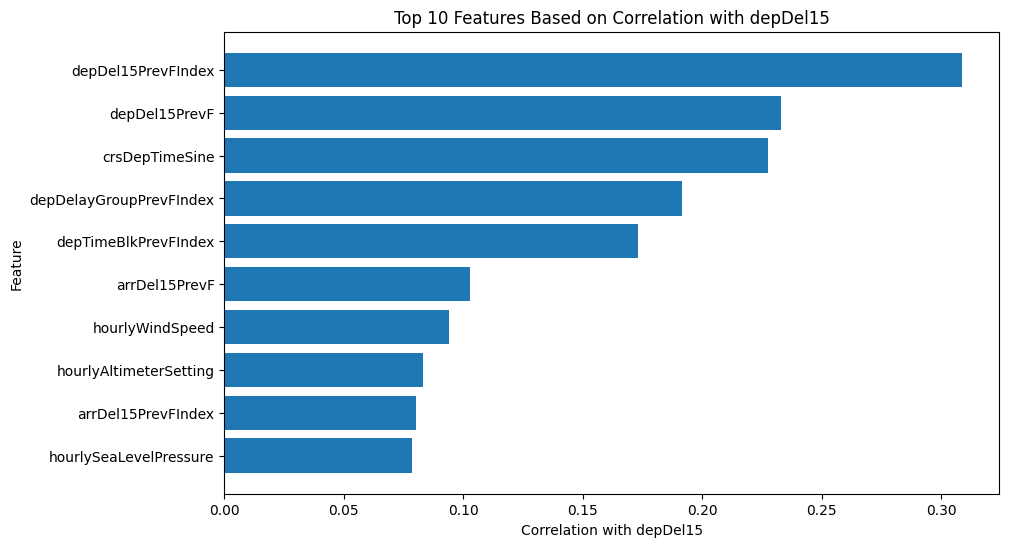

In [0]:
from pyspark.sql.functions import col
import pandas as pd
import matplotlib.pyplot as plt

# Compute correlations of numeric features with the label
numeric_features = [col for col in train_df.columns if col not in ["depDel15"] and train_df.schema[col].dataType.simpleString() in ["double", "float", "integer"]]

correlations = {}
for feature in numeric_features:
    corr = train_df.stat.corr("depDel15", feature)
    correlations[feature] = abs(corr)  # Use absolute value to get the magnitude

# Sort features by correlation
sorted_features = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

# Convert to a DataFrame for easier visualization
top_features_df = pd.DataFrame(sorted_features, columns=["Feature", "Correlation"])

# Display top 10 features
print(top_features_df.head(10))

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(top_features_df["Feature"].head(10), top_features_df["Correlation"].head(10))
plt.gca().invert_yaxis()
plt.xlabel("Correlation with depDel15")
plt.ylabel("Feature")
plt.title("Top 10 Features Based on Correlation with depDel15")
plt.show()


### Distributed Deep Learning Model

In [0]:
import numpy as np

In [0]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import udf
from pyspark.ml.linalg import VectorUDT

# Step 0: Convert `array<double>` to `Vector`
array_to_vector_udf = udf(lambda array: Vectors.dense(array), VectorUDT())
df_train = df_train.withColumn("scaled_vector", array_to_vector_udf("scaled_array"))
df_test = df_test.withColumn("scaled_vector", array_to_vector_udf("scaled_array"))

# Step 1: Prepare Features and Labels
# Assemble features (already in vector form now)
train_df = df_train.select("scaled_vector", "depDel15").withColumnRenamed("scaled_vector", "features")
test_df = df_test.select("scaled_vector", "depDel15").withColumnRenamed("scaled_vector", "features")

# Convert features to numpy arrays
train_features = np.array(train_df.select("features").rdd.map(lambda row: row["features"].toArray()).collect())
test_features = np.array(test_df.select("features").rdd.map(lambda row: row["features"].toArray()).collect())

# Convert labels to numpy arrays
train_labels = np.array(train_df.select("depDel15").rdd.map(lambda row: row["depDel15"]).collect())
test_labels = np.array(test_df.select("depDel15").rdd.map(lambda row: row["depDel15"]).collect())

# Step 2: Build the Deep Learning Model
input_dim = train_features.shape[1]

model = Sequential()
model.add(Dense(256, input_shape=(input_dim,), activity_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(256, activity_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(1))  # Single output unit for binary classification
model.add(Activation('sigmoid'))

# Compile the model
model.compile(
    loss='binary_crossentropy', 
    optimizer=Adam(learning_rate=0.01), 
    metrics=['accuracy']
)

# Step 3: Train the Model
history = model.fit(
    train_features, 
    train_labels, 
    epochs=25, 
    batch_size=64, 
    validation_split=0.1, 
    verbose=1
)

# Step 4: Evaluate the Model
# Make predictions
test_predictions = (model.predict(test_features) > 0.5).astype("int32")

# Calculate metrics
precision = precision_score(test_labels, test_predictions)
recall = recall_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions)
f_beta = fbeta_score(test_labels, test_predictions, beta=2)

# Display results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"F-Beta Score: {f_beta}")

/databricks/python/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
 2476/27973 ━━━━━━━━━━━━━━━━━━━━ 1:09 3ms/step - accuracy: 0.52

*** WARNING: max output size exceeded, skipping output. ***

15559/15559 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step
Precision: 0.6994969857543294
Recall: 0.06945921935112423
F1 Score: 0.12637004356391687
F-Beta Score: 0.08472085415660964
